In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
dd=pd.read_csv('/content/drive/MyDrive/traffic.csv',index_col=0, parse_dates=True)
dd

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041
...,...,...,...
2017-06-30 19:00:00,4,11,20170630194
2017-06-30 20:00:00,4,30,20170630204
2017-06-30 21:00:00,4,16,20170630214


In [31]:
dd.index.year==2015

array([ True,  True,  True, ..., False, False, False])

In [4]:
sub=dd[(dd.index.year==2016) & (dd.Junction==1)][['Vehicles']]

In [34]:
sub

,Vehicles
DateTime,
2016-01-01 00:00:00,13
2016-01-01 01:00:00,13
2016-01-01 02:00:00,11
2016-01-01 03:00:00,6
2016-01-01 04:00:00,8
...,...
2016-12-31 19:00:00,33
2016-12-31 20:00:00,37
2016-12-31 21:00:00,32


In [65]:
sub['day']=sub.index.strftime('%A')

In [66]:
sub

,Vehicles,day
DateTime,,
2016-01-01 00:00:00,13,Friday
2016-01-01 01:00:00,13,Friday
2016-01-01 02:00:00,11,Friday
2016-01-01 03:00:00,6,Friday
2016-01-01 04:00:00,8,Friday
...,...,...
2016-12-31 19:00:00,33,Saturday
2016-12-31 20:00:00,37,Saturday
2016-12-31 21:00:00,32,Saturday


In [53]:
import seaborn as sns

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Saturday'),
  Text(2, 0, 'Sunday'),
  Text(3, 0, 'Monday'),
  Text(4, 0, 'Tuesday'),
  Text(5, 0, 'Wednesday'),
  Text(6, 0, 'Thursday')])

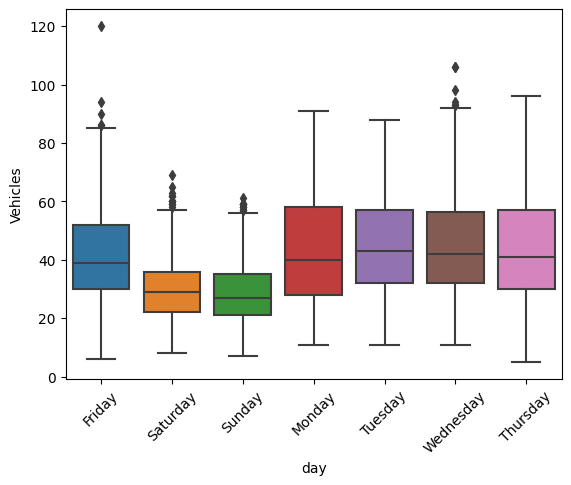

In [71]:
sns.boxplot(x = sub['day'],
            y = sub['Vehicles'])
plt.xticks(rotation=45)

In [8]:
sub.reset_index(drop=True, inplace=True)

In [11]:
sub.set_index('DateTime', inplace=True)

In [35]:
sub.isna().sum()

Vehicles    0
dtype: int64

# EDA

In [13]:
sub

,Vehicles
DateTime,
2016-01-01 00:00:00,13
2016-01-01 01:00:00,13
2016-01-01 02:00:00,11
2016-01-01 03:00:00,6
2016-01-01 04:00:00,8
...,...
2016-12-31 19:00:00,33
2016-12-31 20:00:00,37
2016-12-31 21:00:00,32


array([[<Axes: title={'center': 'Vehicles'}>]], dtype=object)

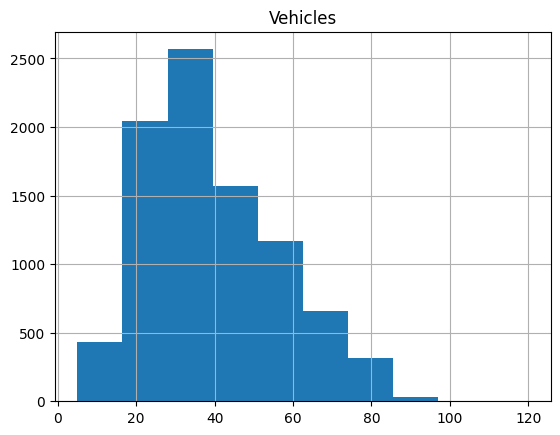

In [5]:
sub.hist()

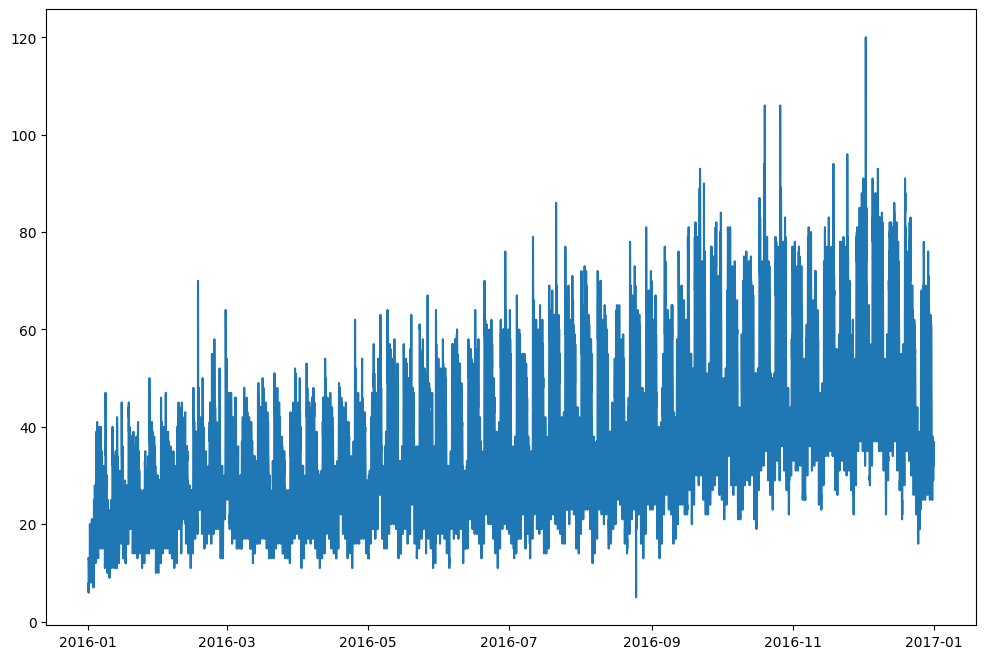

In [43]:
#
plt.figure(figsize=(12,8))
#sub.set_index(sub.DateTime, inplace=True)
plt.plot(sub.Vehicles)

# Dickey- fully Test

In [9]:
from statsmodels.tsa.stattools import adfuller

#dftest = adfuller(df["traffic"], autolag="AIC")

In [6]:
def test_stationarity(df, ts):

  rolmean = df[ts].rolling(window=5, center= False).mean()
  rolstd =  df[ts].rolling(window=5, center = False).std()

  orig = plt.plot(df[ts], color = 'blue', label ="Original")
  mean = plt.plot(rolmean, color ='red', label ="Rolling Mean")
  std = plt.plot(rolstd, color='black', label ="Rolling Std")
  plt.legend(loc = 'best')
  plt.title("Rolling Mean and Standard Deviation for  %s" %(ts))
  plt.xticks(rotation =45)
  plt.show(block = False)
  plt.close

  print('Results:')
  dftest = adfuller(df[ts], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=["Test Statistic",'p=value','# Lags Used',' Number of Observations'])

  for key, value in dftest[4].items():
    dfoutput['Critical Value(%s)' %key]= value

  print(dfoutput)

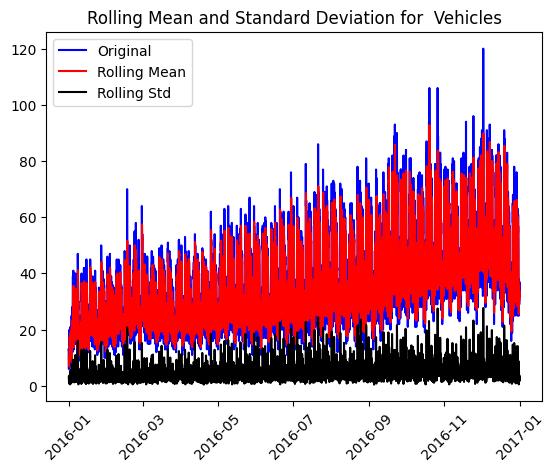

Results:
Test Statistic            -7.541931e+00
p=value                    3.360324e-11
# Lags Used                3.700000e+01
 Number of Observations    8.746000e+03
Critical Value(1%)        -3.431098e+00
Critical Value(5%)        -2.861871e+00
Critical Value(10%)       -2.566946e+00
dtype: float64


In [10]:
test_stationarity(sub,"Vehicles")


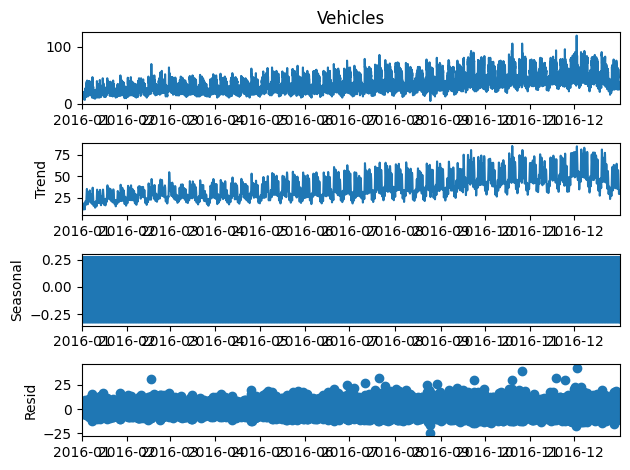

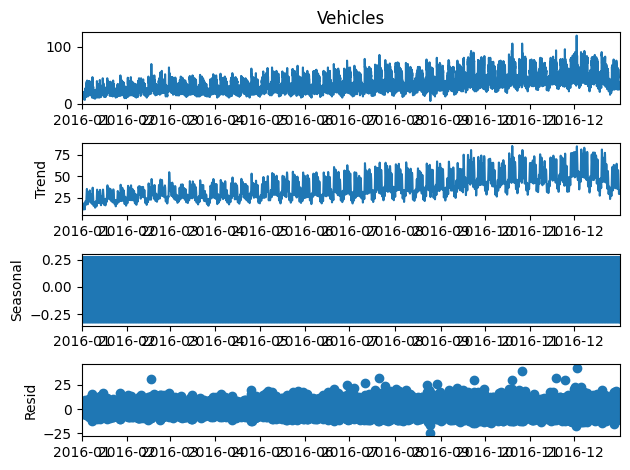

In [11]:
decomposition = seasonal_decompose(sub.Vehicles, period=10, extrapolate_trend=1)
decomposition.plot()

# **PACF & ACF**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


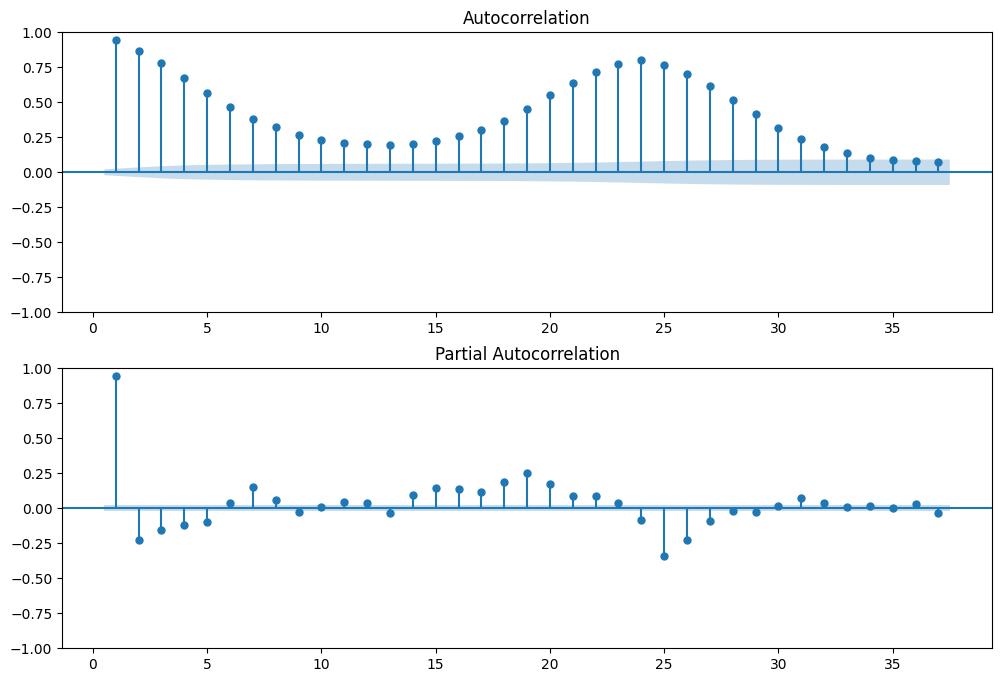

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))

# Plot the ACF of df
plot_acf(sub.Vehicles, lags=37, zero=False, ax=ax1);

# Plot the PACF of df
plot_pacf(sub.Vehicles, lags=37, zero=False, ax=ax2);

## Split Data into Train and Test

In [13]:
train, test = sub.iloc[:-24,:], sub.iloc[-24:,:]


In [17]:
test

,Vehicles
DateTime,
2016-12-31 00:00:00,45
2016-12-31 01:00:00,35
2016-12-31 02:00:00,31
2016-12-31 03:00:00,33
2016-12-31 04:00:00,26
2016-12-31 05:00:00,26
2016-12-31 06:00:00,25
2016-12-31 07:00:00,25
2016-12-31 08:00:00,26


# **ARIMA Forecast**

In [14]:
from statsmodels.tsa.arima.model import ARIMA

In [15]:
def run_Arima(df,ts,p,d,q):
  model = ARIMA(df[ts], order=(p,d,q))
  results_arima = model.fit()

  len_results = len(results_arima.fittedvalues)
  ts_modified = df[ts][-len_results:]

  rss = sum((results_arima.fittedvalues-ts_modified)**2)
  rmse = np.sqrt(rss/len(df[ts]))
  print("RMSE:", rmse)

  plt.figure()
  plt.plot(df[ts])
  plt.plot(results_arima.fittedvalues, color="red")
  plt.show()

  return results_arima

In [ ]:
model_AR = run_Arima(df=train, ts="traffic", p=3,d=0,q=3)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 5.009646419099485


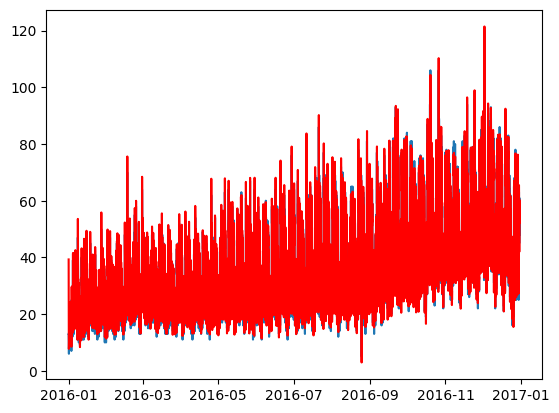

In [16]:
model_AR = run_Arima(df=train, ts="Vehicles", p=10,d=0,q=3)


In [ ]:
my_forecast=model_AR.get_forecast(steps=len(test))

In [ ]:
yhat=my_forecast.predicted_mean
conf_int=my_forecast.conf_int(alpha=0.05)

In [ ]:
rss = sum((yhat-test.Vehicles)**2)
rmse = np.sqrt(rss/len(test))
print("RMSE:", rmse)

RMSE: 8.820919499371891


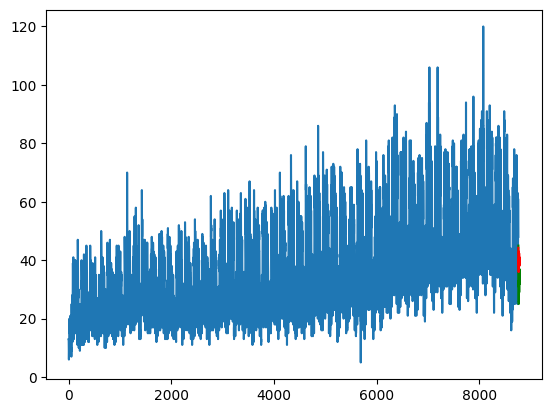

In [ ]:
plt.figure()
plt.plot(train.Vehicles)
plt.plot(test.Vehicles, color='green')
plt.plot(yhat, color='red')

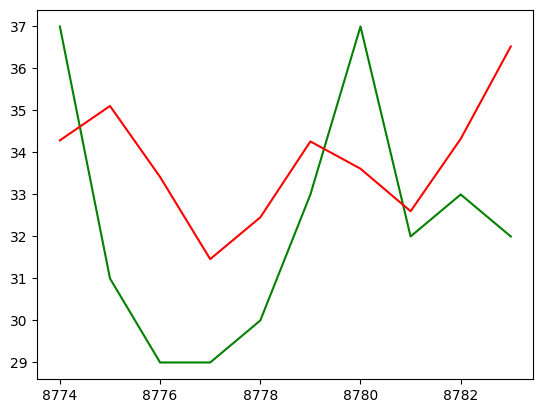

In [ ]:
plt.figure()
plt.plot(test.Vehicles, color='green')
plt.plot(yhat, color='red')

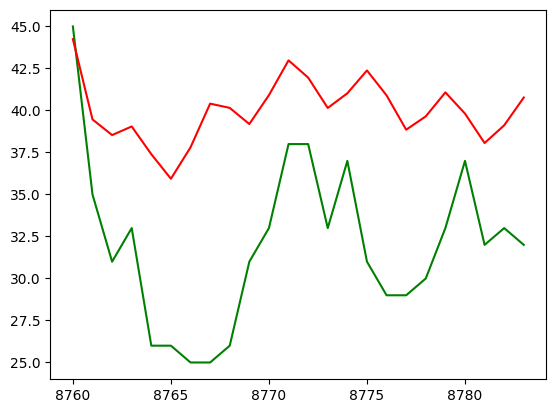

In [ ]:
plt.figure()
plt.plot(test.Vehicles, color='green')
plt.plot(yhat, color='red')

In [ ]:
history = [x for x in train.Vehicles.values]
predictions = list()

for t in range(len(test)):
 model = ARIMA(history, order=(10,0,3))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test.iloc[t,0]
 history.append(obs)
 #print('predicted=%f, expected=%f' % (yhat, obs))

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood op

In [ ]:
rss = sum((predictions-test.Vehicles)**2)
rmse = np.sqrt(rss/len(test))
print("RMSE:", rmse)

RMSE: 3.364051386878289


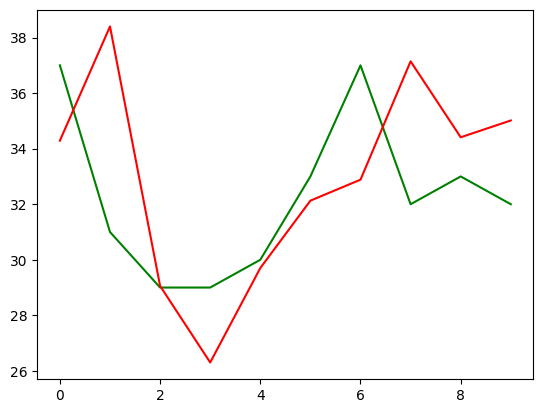

In [ ]:
plt.figure()
plt.plot(test.Vehicles.values, color='green')
plt.plot(predictions, color='red')

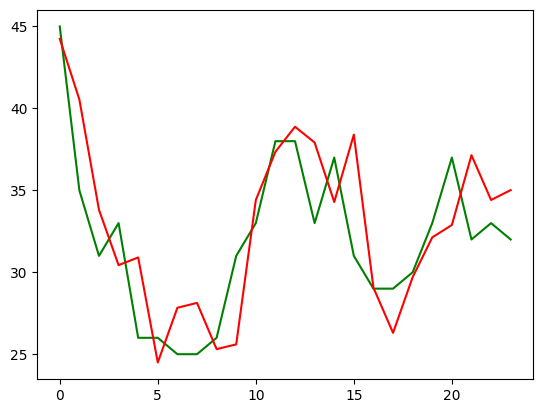

In [ ]:
plt.figure()
plt.plot(test.Vehicles.values, color='green')
plt.plot(predictions, color='red')